<a href="https://colab.research.google.com/github/bkj281/MobilePricePrediction/blob/main/MobilePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/mobiles.csv')

In [ ]:
df.head()

,url,Brand,Product Name,Model,Picture URL,1 Stars,2 Stars,3 Stars,4 Stars,5 Stars,...,Dimensions (mm),Colours,Expandable storage up to (GB),FM,NFC,USB OTG,Wi-Fi Direct,Processor make,Infrared,other_info
0,https://gadgets.ndtv.com/vivo-v11-pro-5632,Vivo,"Vivo V11 Pro (6GB RAM, 64GB) - Supernova Red",V11 Pro,https://i.gadgets360cdn.com/products/large/153...,5,2,6,18,70,...,157.91 x 75.08 x 7.90,"Dazzling Gold, Starry Black",256,Yes,No,Yes,Yes,Qualcomm Snapdragon 660,No,"{'Weight (g)': '156.00', 'Sim 1 Supports 4G in..."
1,https://gadgets.ndtv.com/vivo-v11-pro-5632,Vivo,"Vivo V11 Pro (6GB RAM, 64GB) - Dazzling Gold",V11 Pro,https://i.gadgets360cdn.com/products/large/153...,5,2,6,18,70,...,157.91 x 75.08 x 7.90,"Dazzling Gold, Starry Black",256,Yes,No,Yes,Yes,Qualcomm Snapdragon 660,No,"{'Weight (g)': '156.00', 'Sim 1 Supports 4G in..."
2,https://gadgets.ndtv.com/vivo-v11-pro-5632,Vivo,"Vivo V11 Pro (6GB RAM, 64GB) - Starry Night Black",V11 Pro,https://i.gadgets360cdn.com/products/large/153...,5,2,6,18,70,...,157.91 x 75.08 x 7.90,"Dazzling Gold, Starry Black",256,Yes,No,Yes,Yes,Qualcomm Snapdragon 660,No,"{'Weight (g)': '156.00', 'Sim 1 Supports 4G in..."
3,https://gadgets.ndtv.com/redmi-note-5-pro-4607,Xiaomi,"Redmi Note 5 Pro (4GB RAM, 64GB) - Red",Redmi Note 5 Pro,https://i.gadgets360cdn.com/products/large/151...,7,2,6,20,65,...,158.60 x 75.40 x 8.05,"Black, Blue, Gold, Red, Rose Gold",128,Yes,No,Yes,Yes,Qualcomm Snapdragon 636,No,"{'Weight (g)': '181.00', 'Barometer': 'No', 'S..."
4,https://gadgets.ndtv.com/redmi-note-5-pro-4607,Xiaomi,"Redmi Note 5 Pro (6GB RAM, 64GB) - Rose Gold",Redmi Note 5 Pro,https://i.gadgets360cdn.com/products/large/151...,7,2,6,20,65,...,158.60 x 75.40 x 8.05,"Black, Blue, Gold, Red, Rose Gold",128,Yes,No,Yes,Yes,Qualcomm Snapdragon 636,No,"{'Weight (g)': '181.00', 'Barometer': 'No', 'S..."


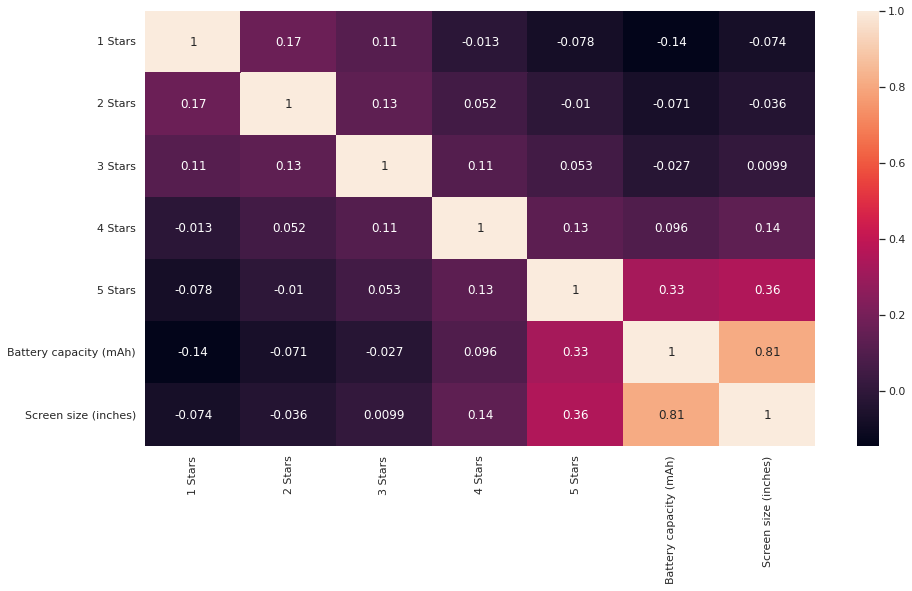

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8775 entries, 0 to 8774
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            8775 non-null   object 
 1   Brand                          8775 non-null   object 
 2   Product Name                   5703 non-null   object 
 3   Model                          8775 non-null   object 
 4   Picture URL                    8775 non-null   object 
 5   1 Stars                        8775 non-null   int64  
 6   2 Stars                        8775 non-null   int64  
 7   3 Stars                        8775 non-null   int64  
 8   4 Stars                        8775 non-null   int64  
 9   5 Stars                        8775 non-null   int64  
 10  Total Ratings                  6036 non-null   object 
 11  Price in India                 5703 non-null   object 
 12  Battery capacity (mAh)         8508 non-null   f

In [ ]:
df = df[['Price in India','RAM','Processor','Battery capacity (mAh)','Internal storage','Expandable storage up to (GB)','Screen size (inches)']]

In [ ]:
100* df.isnull().sum() / len(df)

Price in India                   35.008547
RAM                               7.350427
Processor                         3.213675
Battery capacity (mAh)            3.042735
Internal storage                  5.492877
Expandable storage up to (GB)    21.287749
Screen size (inches)              0.934473
dtype: float64

In [ ]:
df[df['RAM'].isnull()]

0       False
1       False
2       False
3       False
4       False
        ...  
8770    False
8771    False
8772    False
8773     True
8774     True
Name: RAM, Length: 8775, dtype: bool

In [ ]:
df['RAM'] = df['RAM'].str.replace("GB", "")
df['RAM'] = df['RAM'].str.replace("MB", "")
df['RAM'] = df['RAM'].astype('float')

In [ ]:
df['RAM'].value_counts()

1.000      1779
2.000      1651
3.000      1300
4.000      1180
512.000     802
6.000       578
8.000       320
256.000     221
1.500        91
12.000       63
768.000      42
64.000       33
32.000       27
128.000      21
16.000        6
384.000       5
10.000        2
1.024         2
290.000       2
150.000       2
20.000        1
168.000       1
2.048         1
Name: RAM, dtype: int64

In [ ]:
df = (df[df['RAM'] <= 16.0]) 
df = (df[df['RAM'] >= 2.0])

In [ ]:
df['RAM'].value_counts()

2.000     1651
3.000     1300
4.000     1180
6.000      578
8.000      320
12.000      63
16.000       6
10.000       2
2.048        1
Name: RAM, dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
missingvalues = SimpleImputer(missing_values = np.NaN,strategy='median')
x = df.iloc[:,1].values
x = x.reshape(-1,1)
df.iloc[:,1] = missingvalues.fit_transform(x)

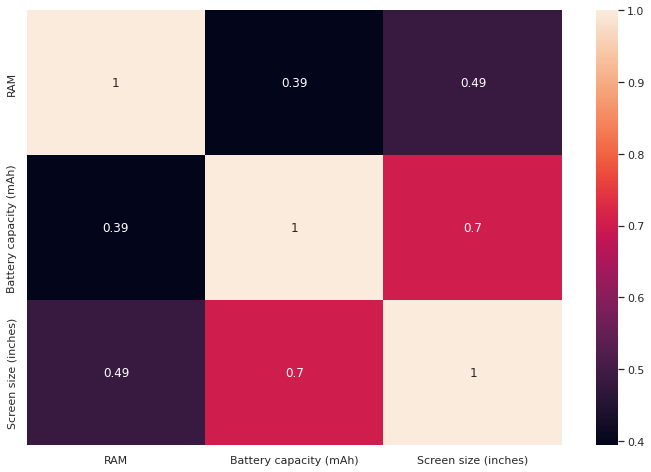

In [ ]:
sns.set(rc = {'figure.figsize':(12,8)})
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
df['Expandable storage up to (GB)'] = df['Expandable storage up to (GB)'].str.replace("GB", "")
df['Expandable storage up to (GB)'] = df['Expandable storage up to (GB)'].str.replace("TB", "")
df['Expandable storage up to (GB)'] = df['Expandable storage up to (GB)'].astype('float')

In [ ]:
df.head()

,Price in India,RAM,Processor,Battery capacity (mAh),Internal storage,Expandable storage up to (GB),Screen size (inches)
0,"₹ 28,990",6.0,octa-core,3400.0,64GB,256.0,6.41
1,"₹ 22,654",6.0,octa-core,3400.0,64GB,256.0,6.41
2,"₹ 23,990",6.0,octa-core,3400.0,64GB,256.0,6.41
3,"₹ 11,290",4.0,1.8GHz octa-core,4000.0,64GB,128.0,5.99
4,"₹ 12,900",4.0,1.8GHz octa-core,4000.0,64GB,128.0,5.99


In [ ]:
df['Internal storage'] = df['Internal storage'].str.replace("GB", "")
df['Internal storage'] = df['Internal storage'].str.replace("MB", "")
df['Internal storage'] = df['Internal storage'].astype('float')

In [ ]:
df.describe()

,RAM,Battery capacity (mAh),Internal storage,Expandable storage up to (GB),Screen size (inches)
count,5101.000000,5041.000000,5074.000000,3718.000000,5062.000000
mean,3.690266,3531.515176,53.304691,1452.928725,5.740905
std,1.971286,955.899015,52.029960,32940.798928,0.664764
min,2.000000,500.000000,4.000000,1.000000,1.400000
25%,2.000000,3000.000000,16.000000,128.000000,5.200000
50%,3.000000,3315.000000,32.000000,200.000000,5.700000
75%,4.000000,4000.000000,64.000000,256.000000,6.300000
max,16.000000,18000.000000,512.000000,1000000.000000,8.000000


In [ ]:
df['Price in India'] = df['Price in India'].str.replace("₹ ", "")
df['Price in India'] = df['Price in India'].str.replace(",", "")
df['Price in India'] = df['Price in India'].astype('float')

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for i in range(1, 7):
    y = df.iloc[:,i].values
    df.iloc[:,i] = labelencoder.fit_transform(y)
    x = y.reshape(-1,1)

In [ ]:
df.describe()

,Price in India,RAM,Processor,Battery capacity (mAh),Internal storage,Expandable storage up to (GB),Screen size (inches)
count,3659.000000,5101.000000,5101.000000,5101.000000,5101.000000,5101.000000,5101.000000
mean,16579.681060,2.069006,107.525975,131.057244,3.955695,9.642423,51.509900
std,17108.975653,1.702116,70.564033,61.074499,1.583740,4.372772,25.835174
min,189.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7209.500000,0.000000,32.000000,93.000000,2.000000,6.000000,28.000000
50%,10999.000000,2.000000,103.000000,131.000000,4.000000,8.000000,40.000000
75%,17999.000000,3.000000,178.000000,171.000000,5.000000,16.000000,72.000000
max,178000.000000,8.000000,215.000000,238.000000,9.000000,16.000000,119.000000


In [ ]:
df.describe()

,Price in India,RAM,Processor,Battery capacity (mAh),Internal storage,Expandable storage up to (GB),Screen size (inches)
count,3659.000000,5101.000000,5101.000000,5101.000000,5101.000000,5101.000000,5101.000000
mean,16579.681060,2.069006,107.525975,131.057244,3.955695,9.642423,51.509900
std,17108.975653,1.702116,70.564033,61.074499,1.583740,4.372772,25.835174
min,189.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7209.500000,0.000000,32.000000,93.000000,2.000000,6.000000,28.000000
50%,10999.000000,2.000000,103.000000,131.000000,4.000000,8.000000,40.000000
75%,17999.000000,3.000000,178.000000,171.000000,5.000000,16.000000,72.000000
max,178000.000000,8.000000,215.000000,238.000000,9.000000,16.000000,119.000000


In [ ]:
df.isnull().sum()

Price in India                   1442
RAM                                 0
Processor                           0
Battery capacity (mAh)              0
Internal storage                    0
Expandable storage up to (GB)       0
Screen size (inches)                0
dtype: int64

In [ ]:
df = df.dropna(subset=['Price in India'])

In [ ]:
df.isnull().sum()

Price in India                   0
RAM                              0
Processor                        0
Battery capacity (mAh)           0
Internal storage                 0
Expandable storage up to (GB)    0
Screen size (inches)             0
dtype: int64

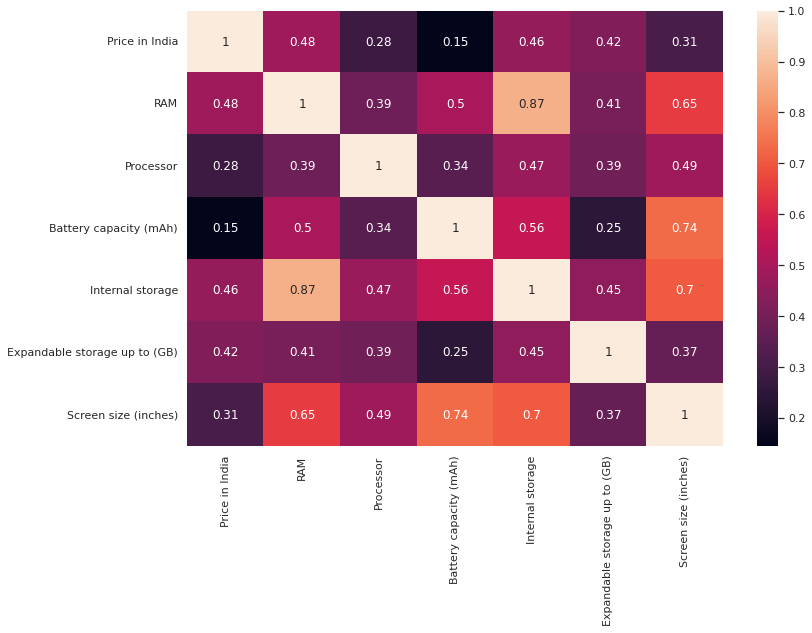

In [ ]:
sns.set(rc = {'figure.figsize':(12,8)})
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
X = df[['RAM','Processor','Battery capacity (mAh)','Internal storage','Expandable storage up to (GB)','Screen size (inches)']]
y = df[['Price in India']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2744, 6) (915, 6) (2744, 1) (915, 1)


In [ ]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
reg.score(X_test,y_test)

0.2683832419853234

In [ ]:
reg.coef_

array([[3758.51427599,   12.48974839,  -55.64105999, 1138.46721661,
         937.12108737,   34.7231006 ]])

In [ ]:
reg.predict(X_test)

array([[-3152.81867264],
       [17118.61114113],
       [23989.02686761],
       [28894.9118773 ],
       [23531.7432118 ],
       [17079.89637242],
       [ 8130.14921004],
       [20150.39744186],
       [ 7389.7742216 ],
       [29020.35315543],
       [28443.57740697],
       [20102.19455065],
       [17668.50696869],
       [ 3941.95228931],
       [ 9345.55769328],
       [26563.74384263],
       [24602.79216315],
       [14838.36333862],
       [19435.50743285],
       [15791.9112108 ],
       [13439.65607378],
       [ 6293.33507923],
       [23442.51920189],
       [ 8981.47004632],
       [10924.61350771],
       [28762.4385716 ],
       [12742.40107447],
       [21753.37254507],
       [ 2420.2819719 ],
       [ 8041.02199207],
       [ 2857.6053468 ],
       [ 7177.1957917 ],
       [12491.45283397],
       [ 4374.7089349 ],
       [ 5477.89421229],
       [20689.70567636],
       [16060.24748657],
       [ 5131.59405949],
       [ 7271.52794334],
       [17952.88924866],


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


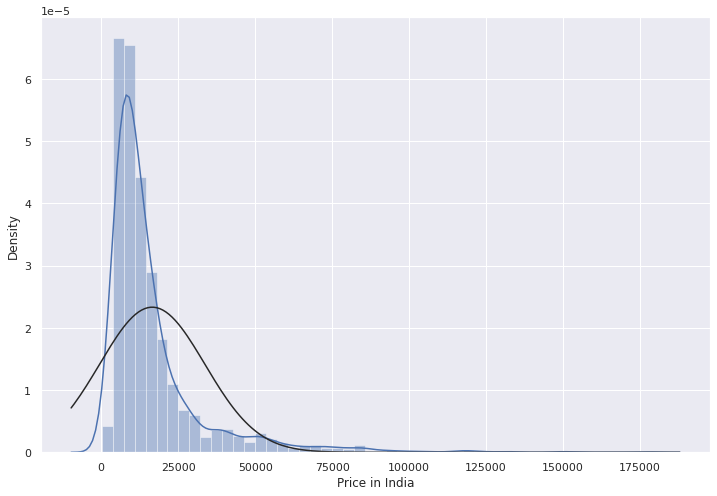

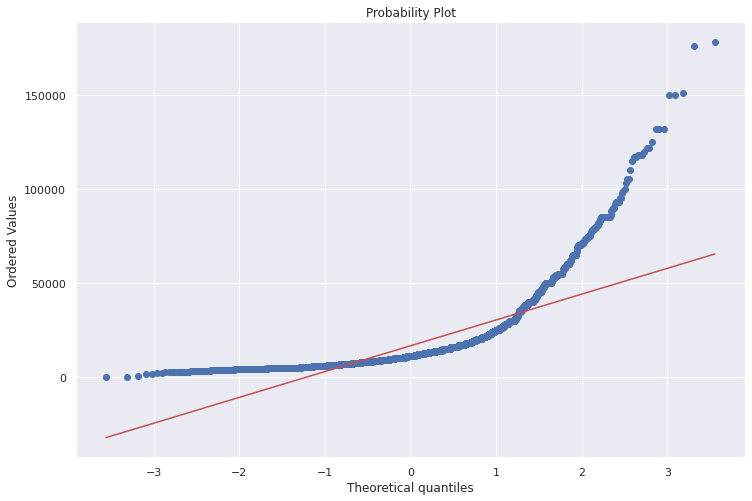

In [ ]:
from scipy.stats import norm
from scipy import stats
sns.distplot(df['Price in India'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['Price in India'], plot=plt)

In [ ]:
# df[df['RAM'] <= 16]

In [ ]:
from sklearn.tree import DecisionTreeRegressor 
regressor = DecisionTreeRegressor(random_state = 0) 
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
# predicting a new value
  
# test the output by changing values, like 3750
y_pred = regressor.predict(X_test)
y_pred

array([  8700.        ,  15641.30769231,  17999.        ,  12490.        ,
        13999.33333333,  12518.2       ,   9990.        ,  19865.66666667,
        32567.5       ,  10599.        ,  58595.        ,  13649.5       ,
         6490.        ,   4999.        ,   7399.5       ,  22450.        ,
        40712.14285714,   7859.75      ,  13999.        ,  12665.66666667,
         5374.        ,   9399.        ,  21599.        ,  10037.9       ,
         8999.        ,  51945.        ,   8237.85714286,   9999.        ,
        10574.625     ,  11999.        ,   5999.        ,   4490.        ,
         6574.        ,   9331.        ,   5319.        ,  13639.66666667,
        10990.        ,   4249.        ,   8990.        ,  10124.57142857,
         6429.33333333,   5195.        ,   6649.        ,  25990.        ,
        13749.71428571,  15326.33333333,  28330.83333333,  16539.        ,
        93930.        ,  17994.5       ,   6027.5       ,  17462.33333333,
        12195.        ,  

In [ ]:
regressor.score(X_test,y_test)

0.808424382886473

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

In [ ]:
RMSE

7797.217500919019

In [ ]:
df['Price in India'].mean()

16579.681060399016

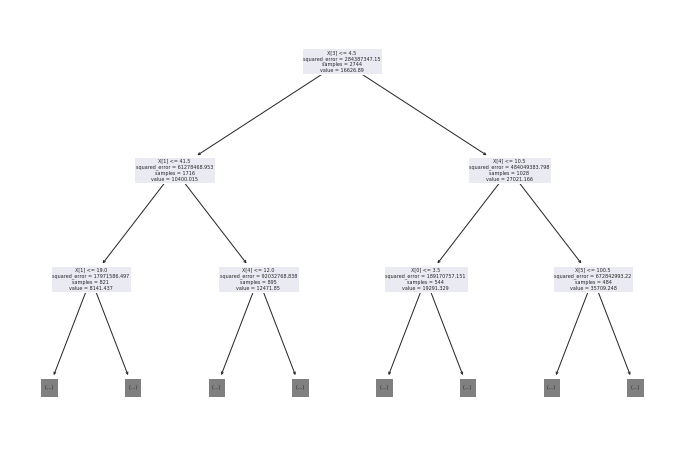

In [ ]:
from sklearn import tree
tree.plot_tree(regressor,max_depth=2)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 100, random_state = 0)
forest.fit(X_train, y_train) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(random_state=0)

In [ ]:
y_pred_forest = forest.predict(X_test)

In [ ]:
y_pred_forest

array([  8627.95451732,  15688.18742716,  17855.31207143,  19529.49183333,
        16809.65514286,  12625.59165079,  10814.36683333,  19760.61178571,
        31729.72362229,  10756.20148629,  52700.5735    ,  14298.61566667,
         8337.53330411,   6817.297     ,   7294.78755195,  22581.98880952,
        40463.67071817,   8175.43578824,  13443.7995    ,  12522.95519048,
         6415.65733333,   9381.29888889,  20027.91701177,  10029.40541977,
         8908.10333333,  50221.10333333,   8280.81568437,  13843.73946429,
        10655.57305893,  10988.005     ,   7851.66763889,   5806.66      ,
         6604.88531746,   9527.01075433,   4663.90449206,  13421.55503571,
        11113.83883478,   6173.24011905,   8868.24      ,  10097.80868778,
         8168.094     ,   6343.7245    ,   6926.0508254 ,  20853.99736508,
        13736.11654618,  15213.96657143,  28335.73753571,  14710.69131457,
        89294.90047619,  19776.2227619 ,   6003.22842796,  20621.98821429,
        12233.94385714,  

In [ ]:
forest.score(X_test,y_test)

0.8125408137806458

In [ ]:
MAE = mean_absolute_error(y_test,y_pred_forest)
MSE = mean_squared_error(y_test,y_pred_forest)
RMSE = np.sqrt(MSE)

In [ ]:
RMSE

7712.992267730101

In [ ]:
from sklearn.svm import SVR
reg_svr = SVR(kernel='linear')
reg_svr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [ ]:
y_pred_svr = reg_svr.predict(X_test)

In [ ]:
#y_pred_svr

In [ ]:
reg_svr.score(X_test,y_test)

0.12540685101025673

In [ ]:
# X = df[['RAM','Processor','Battery capacity (mAh)','Internal storage','Expandable storage up to (GB)','Screen size (inches)']]
forest.predict([[4,44,105,3,8,45]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([18185.01151154])

In [ ]:
df.value_counts()

Price in India  RAM  Processor  Battery capacity (mAh)  Internal storage  Expandable storage up to (GB)  Screen size (inches)
13999.0         3    200        93                      5                 16                             57                      6
40998.0         5    178        207                     6                 11                             85                      5
9599.0          2    103        168                     4                 8                              67                      5
8499.0          3    71         168                     4                 8                              70                      4
6999.0          0    27         93                      2                 8                              24                      4
                                                                                                                                ..
8293.0          0    31         46                      2                 4             